In [ ]:
# Example of data model, where all 4 assumptions for linearity are violated

In [ ]:
# If we want to make a prediction by linear regression, we must revise that linearity regression assumptions are not violated

In [ ]:
# We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.

In [1]:
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Association of random variables
# LSTAT - the percentage of the population classified as low status
# INDUS - the proportion of non-retail business acres per town
# NOX - the nitric oxide concentrations
# RM - the average number of rooms per dwelling
# MEDV - the median value of the owner-occupied homes in $1000
housing = pd.read_csv('housing.csv')
housing.head()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575,24.0
1,1,9.14,7.07,0.469,6.421,21.6
2,2,4.03,7.07,0.469,7.185,34.7
3,3,2.94,2.18,0.458,6.998,33.4
4,4,5.33,2.18,0.458,7.147,36.2


In [3]:
# Use covariance to calculate the association
housing.cov()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
Unnamed: 0,21378.500000,269.868842,400.668663,6.755757,-8.215627,-304.723960
LSTAT,269.868842,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,400.668663,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,6.755757,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-8.215627,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-304.723960,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [ ]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
Unnamed: 0,1.000000,0.258465,0.399439,0.398736,-0.079971,-0.226604
LSTAT,0.258465,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.399439,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.398736,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.079971,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.226604,-0.737663,-0.483725,-0.427321,0.695360,1.000000


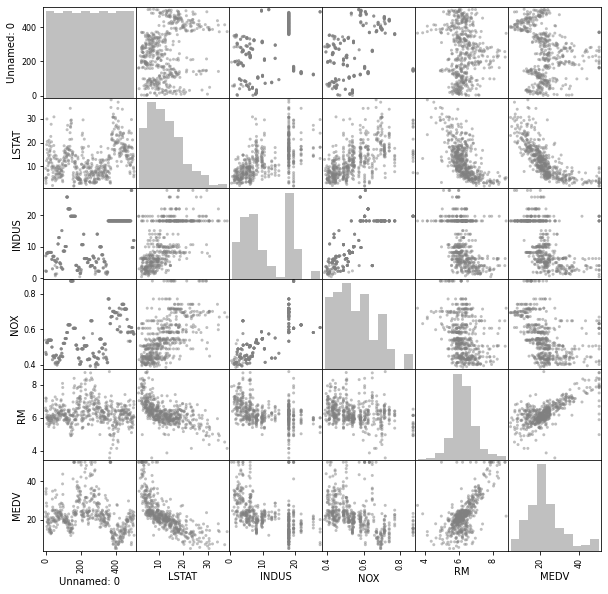

In [4]:
# scatter matrix plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10), color='grey',diagonal='hist', hist_kwds={'color':'silver'})

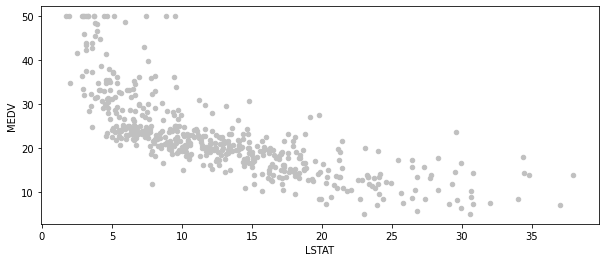

In [11]:
# This time we take a closer look at MEDV vs LSTAT。 What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 4), color='silver')

In [6]:
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']

In [7]:
# For simple linear regression all 4 linearity assumptions are violated: linearity, independence, normality, equal variance
# We perform multiple linear regression   

In [8]:
# 1. Linearity assumption is violated

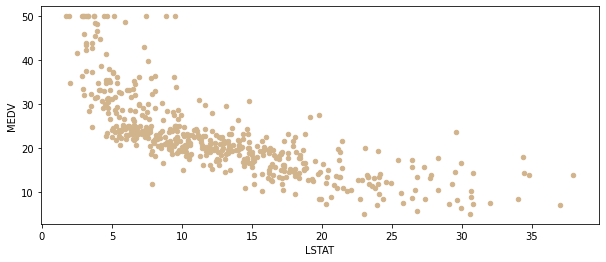

In [10]:
# you can check the scatter plot to have a fast check
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 4), color='tan')

In [ ]:
# 2. Independence is violated as well

In [13]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

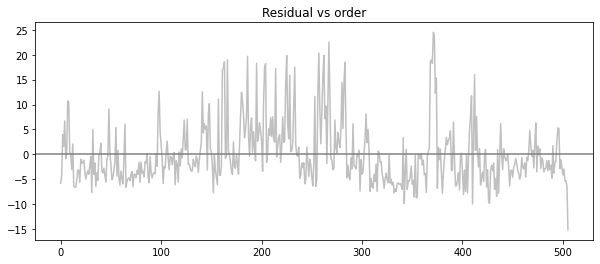

In [15]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(10, 4))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='silver')
plt.axhline(y=0, color='grey')
plt.show()

In [16]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           5.08e-88
Time:                        15:55:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 3. normality assumption is violated as well

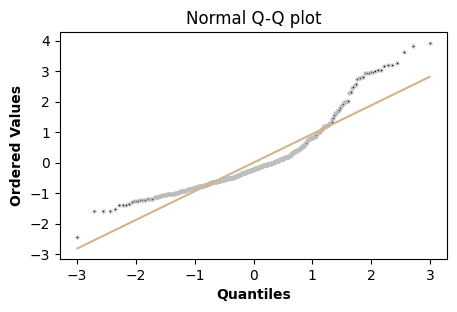

In [17]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)
fig = plt.figure(figsize=[5, 3], dpi=100)
ax = fig.add_subplot(111)
fig=stats.probplot(z, dist='norm', plot=plt)

ax.get_lines()[0].set_marker('.')
ax.get_lines()[0].set_markerfacecolor('k')
ax.get_lines()[0].set_markersize(4.0)
ax.get_lines()[1].set_linewidth(1.5)
ax.get_lines()[0].set_color("silver")
ax.get_lines()[1].set_color("tan")

ax.set_title("Normal Q-Q plot")
ax.set_xlabel("Quantiles", fontsize=10, fontweight='bold')
ax.set_ylabel("Ordered Values", fontsize=10, fontweight='bold')
plt.show()

In [ ]:
# 4. Equal variance assumption is violated as well

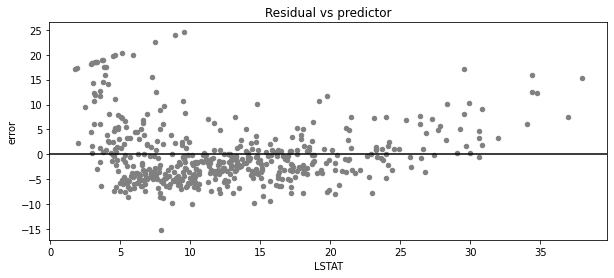

In [18]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(10, 4), color='grey')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='black')
plt.show()

In [ ]:
# Perform multiple linear regression

In [19]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import all stock market data into DataFrame
aord = pd.read_csv('ALLOrdinary.csv')
nikkei = pd.read_csv('Nikkei225.csv')
hsi = pd.read_csv('HSI.csv')
daxi = pd.read_csv('DAXI.csv')
cac40 = pd.read_csv('CAC40.csv')
sp500 = pd.read_csv('SP500.csv')
dji = pd.read_csv('DJI.csv')
nasdaq = pd.read_csv('nasdaq_composite.csv')
spy = pd.read_csv('SPY.csv')

In [ ]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,2653.909912,2661.500000,2597.810059,2609.629883,2609.629883,2076690000
1,2008-01-03,2611.959961,2624.270020,2592.179932,2602.679932,2602.679932,1970200000
2,2008-01-04,2571.080078,2571.080078,2502.679932,2504.649902,2504.649902,2516310000
3,2008-01-07,2514.149902,2521.620117,2471.229980,2499.459961,2499.459961,2600100000
4,2008-01-08,2506.969971,2527.419922,2440.510010,2440.510010,2440.510010,2566480000


In [ ]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [ ]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,15.500000,-71.679688,-464.320313,146.529999
1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-50.100097,-162.750000,-48.830078,144.910004
2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,99.370117,143.339996
3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-117.399903,216.951171,234.450195,141.809998
4,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-27.500000,-354.060547,-158.209961,142.080002


In [ ]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

spy          1
spy_lag1     1
sp500        1
nasdaq       1
dji          1
cac40        3
daxi        11
aord         2
hsi         57
nikkei      57
Price        0
dtype: int64

In [ ]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [ ]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [ ]:
# save this indicepanel for part 4.5
path_save = 'indicepanel.csv'
indicepanel.to_csv(path_save)

In [ ]:
# we have 2678 days
print(indicepanel.shape)

(2678, 11)


In [ ]:
#split the data into (1)train set and (2)test set 
# we must split to train and test to revise if we created model well

Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]
print(Train.shape, Test.shape)

(1000, 11) (1000, 11)


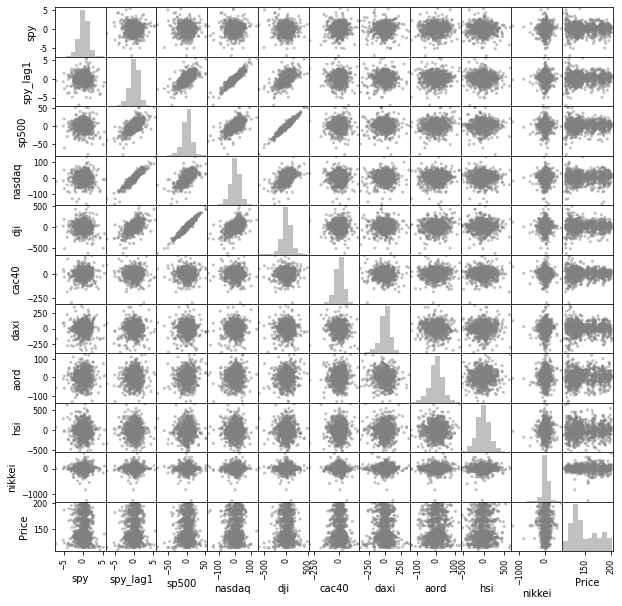

In [ ]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
# data are very noisy, no explicit correlation or trend
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10), color='grey',diagonal='hist', hist_kwds={'color':'silver'})

In [ ]:
# Find the indice with largest correlation, EU predictors have higher impact on SPY than US predictors
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.011623
sp500      -0.018632
nasdaq      0.012333
dji        -0.037097
cac40       0.076886
daxi        0.019410
aord        0.048200
hsi        -0.038361
nikkei      0.035379
Name: spy, dtype: float64


In [ ]:
# F statistic - 
# p value - lower than 0.05 says that our model is uesful
# aord - is the most significant

formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.133
Date:                Fri, 16 Dec 2022   Prob (F-statistic):             0.0245
Time:                        10:28:02   Log-Likelihood:                -1643.1
No. Observations:                1000   AIC:                             3306.
Df Residuals:                     990   BIC:                             3355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0798      0.040      1.993      0.047       0.001       0.158
spy_lag1      -0.1233      0.092     -1.340      0.180      -0.304       0.057
sp500          0.0178      0.014      1.273      0.203      -0.010       0.045
nasdaq         0.0047      0.004      1.240      0.215      -0.003       0.012
dji           -0.0023      0.001     -1.588      0.113      -0.005       0.001
cac40          0.0021      0.001      2.485      0.013       0.000       0.004
aord           0.0017      0.001      1.497      0.135      -0.001       0.004
daxi           0.0003      0.000      0.724      0.469      -0.001       0.001
nikkei         0.0004      0.000      1.293      0.196      -0.000       0.001
hsi           -0.0003      0.000     -1.412      0.158      -0.001       0.000
==============================================================================
Omnibus:                       85.811   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.379
Skew:                          -0.444   Prob(JB):                     7.73e-52
Kurtosis:                       5.205   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

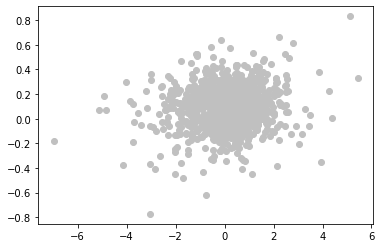

In [ ]:
plt.scatter(Train['spy'], Train['PredictedY'], color='silver')

In [ ]:
# RMSE - Root Mean Squared Error, Adjusted R^2, R2 is increading by including more predictors
# 
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [ ]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [ ]:
# Get the assement table fo our model
# overfitting model: if RMSE and adjusted R-square is much lower(better) in train than in test dataset, we cannot apply this model to real market in future. 

# RMSE (test) is higher(worse) than RMSE (Train), our model is not overfitted. 
# Our R-square is only 1.5 percent, which is quite low, but in stock market it is not bad. 
# we will use predictive value of our model as a signal to buy and sell SPY in both train and test 
# to check whether the signal could generate profit consistently.

assessTable(Test, Train, lm, 9, 'spy')

,Train,Test
R2,0.010102,0.013609
RMSE,1.257534,1.759693


In [ ]:
# Evaluate results

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
indicepanel = pd.read_csv('indicepanel.csv')
indicepanel.head()

,Unnamed: 0,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-50.100097,-162.750000,-48.830078,144.910004
1,2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,99.370117,143.339996
2,3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-117.399903,216.951171,234.450195,141.809998
3,4,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-27.500000,-354.060547,-158.209961,142.080002
4,5,0.589997,-2.990006,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-33.899902,768.359375,-308.639649,139.089996


In [ ]:
Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]

In [ ]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

In [ ]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

In [ ]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  127.99984299999947


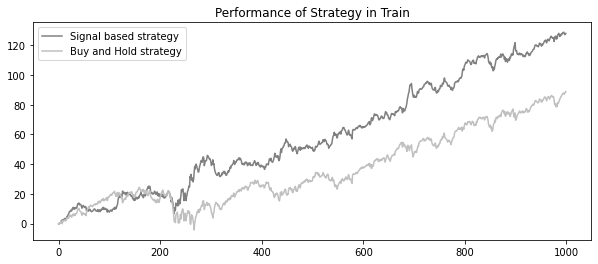

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='grey', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='silver', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [ ]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  15.91051800000011


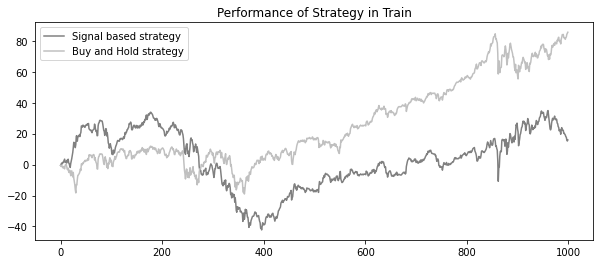

In [ ]:
# signal based ( active) strategy works better than buy and hold strategy ( passive)
plt.figure(figsize=(10, 4))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='grey', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='silver', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [ ]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [ ]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.09401252260740608
Yearly Sharpe Ratio is  1.4924025296702046


In [ ]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.009157915628667352
Yearly Sharpe Ratio is  0.1453774036869933


In [ ]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.13471710175416493


In [ ]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.3234838620552924


In [ ]:
# The result shows that if we apply this strategy in test set, the maximum loss from the peak is nine percent. 
# From the mirror of a Sharpe ratio and maximum drawdown, we can tell that the performance of strategy is quite 
# consistent in place of extreme loss. 
# But the return per unit risk is not very consistent.